# Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Basic info on the Data

In [51]:
df = pd.read_csv("C:\\Project\\corona_tested_individuals_ver_00225.csv")
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
9053443,2020-03-11,0,1,0,1,0,שלילי,NaN,NaN,Abroad
9053444,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053445,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other
9053446,2020-03-11,0,0,0,0,0,שלילי,NaN,NaN,Other


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053448 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 690.7+ MB


In [53]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-02-17,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
2,2022-02-17,0,0,0,0,0,שלילי,No,נקבה,Other
3,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other
4,2022-02-17,0,0,0,0,0,שלילי,No,NaN,Other


### We will now change all the string data to int data:
Female will be 0, male will be 1.
<br> Negative will be 0, positive will be 1.
<br> Under age 60 will be 0, Above will be 1

In [100]:
df['gender'] = df['gender'].replace({"זכר": 1, "נקבה": 0})
df['corona_result'] = df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
df['age_60_and_above'] = df['age_60_and_above'].replace({"Yes": 1, "No": 0})
df.drop(df[df['corona_result'] == 'אחר'].index, inplace = True)





In [71]:
df[df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
count,826347.000000,826347.000000,826347.000000,826347.000000,826347.000000,826347.000000,826347.000000
mean,0.138974,0.116986,0.064633,0.016017,0.125158,0.127350,0.483819
std,0.345920,0.321404,0.245877,0.125543,0.330898,0.333364,0.499738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df[df['corona_result']==0].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
count,5.381036e+06,5.381036e+06,5.381036e+06,5.381036e+06,5.381036e+06,5.381036e+06,5.381036e+06
mean,3.663960e-02,2.707100e-02,1.474344e-02,2.497474e-03,2.878702e-02,1.308841e-01,4.854719e-01
std,1.878753e-01,1.622904e-01,1.205242e-01,4.991230e-02,1.672075e-01,3.372736e-01,4.997889e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [65]:
df['gender'].value_counts()

נקבה    3265183
זכר     3079089
Name: gender, dtype: int64

### Now we will clean all the NaN Data

In [66]:
df.isnull().sum()
df = df.dropna()

In [62]:
df.shape

(6344272, 10)

After we cleaned around 3 milions row of the data, we can still see we have alot of data. we will take a sample from the data that feature distributions are preserved.

In [104]:

sample_df = df.sample(int(len(df) * 0.002))
sample_df.shape


(1652, 10)

In [105]:
sample_df.drop(sample_df[sample_df['corona_result'] == 'אחר'].index, inplace = True)

### info about the sample data

In [23]:
sample_df['gender'].value_counts()

0    6445
1    6243
Name: gender, dtype: int64

In [24]:
cough_sample = sample_df['cough'] == 1
fever_sample = sample_df['fever'] == 1
sore_throat_sample = sample_df['sore_throat']== 1
shortness_of_breath_sample = sample_df['shortness_of_breath']==1
head_ache_sample = sample_df['head_ache']==1
corona_result_sample = sample_df['corona_result']==1
age_60_and_above_sample = sample_df['age_60_and_above']==1

cough_sample = cough_sample.sum()
fever_sample =fever_sample.sum()
sore_throat_sample=sore_throat_sample.sum()
shortness_of_breath_sample=shortness_of_breath_sample.sum()
head_ache_sample=head_ache_sample.sum()
corona_result_sample=corona_result_sample.sum()
age_60_and_above_sample=age_60_and_above_sample.sum()

In [25]:
Distribution_sample={'colums':['cough',
        'fever',
        'sore_throat',
        'shortness_of_breath',
        'head_ache',
        'corona_result',
        'age_60_and_above'],'count':[cough_sample,fever_sample,sore_throat_sample,shortness_of_breath_sample,head_ache_sample,corona_result_sample,age_60_and_above_sample]}

Distribution_sample=pd.DataFrame(data=Distribution_sample,index=range(7))
Distribution_sample

,colums,count
0,cough,621
1,fever,474
2,sore_throat,289
3,shortness_of_breath,45
4,head_ache,507
5,corona_result,1716
6,age_60_and_above,1688


In [26]:
cough = df['cough'] == 1
fever = df['fever'] == 1
sore_throat = df['sore_throat']== 1
shortness_of_breath = df['shortness_of_breath']==1
head_ache = df['head_ache']==1
corona_result = df['corona_result']==1
age_60_and_above = df['age_60_and_above']==1

cough = cough.sum()
fever =fever.sum()
sore_throat=sore_throat.sum()
shortness_of_breath=shortness_of_breath.sum()
head_ache=head_ache.sum()
corona_result=corona_result.sum()
age_60_and_above=age_60_and_above.sum()

In [27]:
Distribution_orginal={'colums':['cough',
        'fever',
        'sore_throat',
        'shortness_of_breath',
        'head_ache',
        'corona_result',
        'age_60_and_above'],'count':[cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above]}

Distribution_orginal=pd.DataFrame(data=Distribution_orginal,index=range(7))
Distribution_orginal

,colums,count
0,cough,318514
1,fever,247145
2,sore_throat,135539
3,shortness_of_breath,27302
4,head_ache,263576
5,corona_result,826347
6,age_60_and_above,827058


Text(0.5, 1.0, 'Distribution_sample')

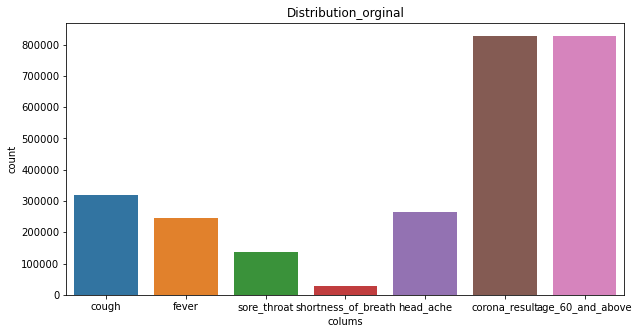

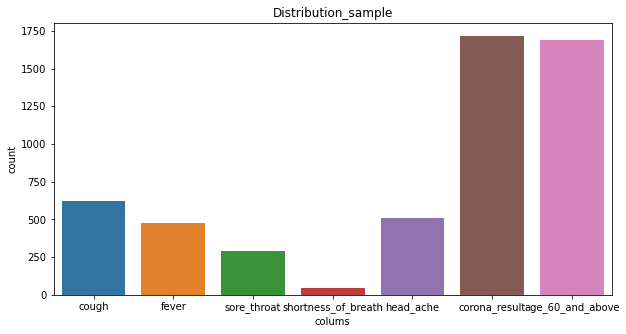

In [72]:
fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_orginal).set_title('Distribution_orginal')

fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_sample).set_title('Distribution_sample')

In [73]:
sample_df[sample_df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.133292,0.115933,0.057657,0.017979,0.128952,0.114073,0.473032
std,0.339995,0.320244,0.233165,0.132916,0.335251,0.317999,0.499427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
sample_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
4495508,2021-01-28,0,0,0,0,0,0,0,0,Other
8961852,2020-04-03,0,0,0,0,0,0,1,0,Other
2145673,2021-08-31,0,0,0,0,0,0,0,0,Contact with confirmed
6915264,2020-09-29,0,0,0,0,0,1,0,1,Other
647135,2022-01-13,0,0,0,0,1,1,0,1,Contact with confirmed


In [106]:
sample_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 2239913 to 2471620
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            1652 non-null   object
 1   cough                1652 non-null   int64 
 2   fever                1652 non-null   int64 
 3   sore_throat          1652 non-null   int64 
 4   shortness_of_breath  1652 non-null   int64 
 5   head_ache            1652 non-null   int64 
 6   corona_result        1652 non-null   int64 
 7   age_60_and_above     1652 non-null   int64 
 8   gender               1652 non-null   int64 
 9   test_indication      1652 non-null   object
dtypes: int64(8), object(2)
memory usage: 206.5+ KB


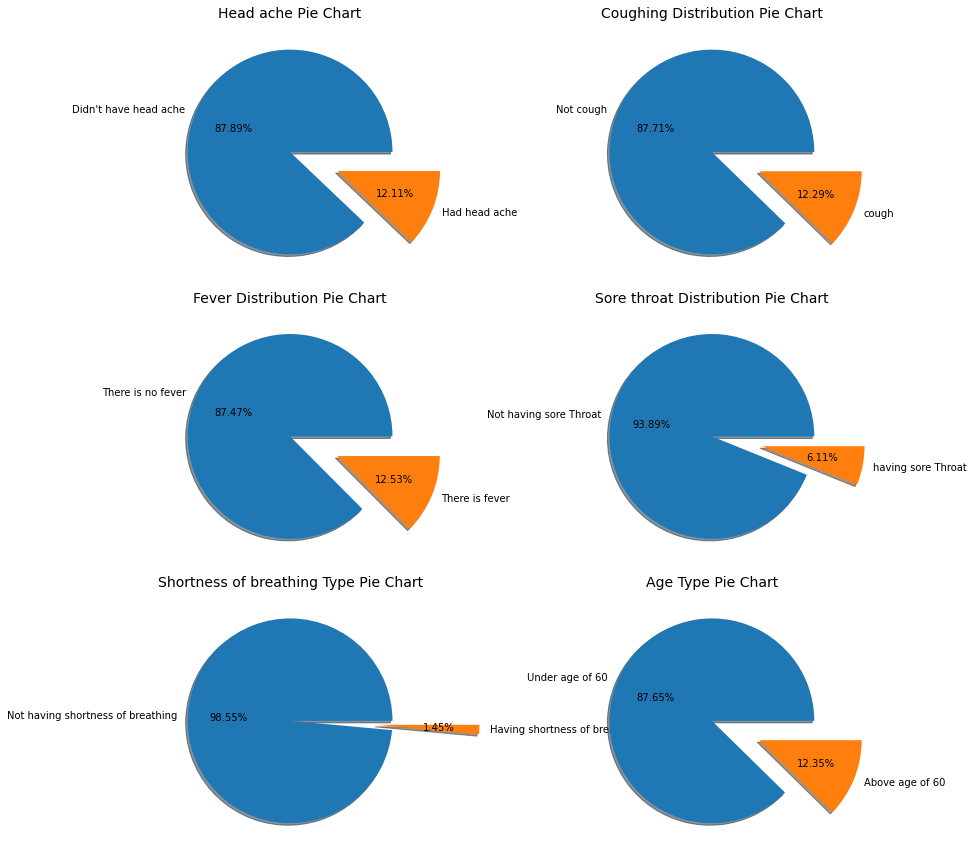

In [109]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6))  = ax
labels = ["Didn't have head ache", "Had head ache"]
values = sample_df['head_ache'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax1.set_title("Head ache Pie Chart", fontdict={'fontsize': 14})

labels = ["Not cough", "cough"]
values = sample_df['cough'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax2.set_title("Coughing Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["There is no fever", "There is fever"]
values = sample_df['fever'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax3.set_title("Fever Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not having sore Throat", "having sore Throat"]
values = sample_df['sore_throat'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax4.set_title("Sore throat Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not having shortness of breathing", "Having shortness of breathing"]
values = sample_df['shortness_of_breath'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.85])
ax5.set_title("Shortness of breathing Type Pie Chart", fontdict={'fontsize': 14})


labels = ["Under age of 60", "Above age of 60"]
values = sample_df['age_60_and_above'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.5])
ax6.set_title("Age Type Pie Chart", fontdict={'fontsize': 14})



plt.tight_layout()
plt.show()